In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [26]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

#Importando dados
data_teste = pd.read_csv("/kaggle/input/titanic/test.csv")
data_train = pd.read_csv("/kaggle/input/titanic/train.csv")

data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## *Analise Inicial do Dataset*

In [27]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
data_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
print (data_train.info())
print ()
print (data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Su

In [30]:
print ('Train Columns: ', data_train.columns)

print ('\nTest Columns: ', data_teste.columns)

Train Columns:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Test Columns:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


- Categorical Features: Sex, Survived, PClass, Embarked
- Numerical Features: Age (Continua), Fare (Continua), SibSp (Discreta), Parch (Discreta)
- Alphanumeric: Cabin, Ticket

In [31]:
data_train.isnull().sum() # Analisando as colunas com valores faltantes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
data_teste.isnull().sum() # Analisando as colunas com valores faltantes

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
train_data = data_train.copy()
teste_data = data_teste.copy() # Copia para n alterar o banco de dados original
cols_drop = ['Name', 'Cabin', 'Ticket']
train = train_data.drop(cols_drop, axis = 1)
teste = teste_data.drop(cols_drop, axis = 1)

## *Exibindo Graficos de Sobrevivencia*

In [34]:
# Criando uma copia do DataSet para plotar graficos
graph_train = data_train.copy()

<Axes: title={'center': 'Sobrevivencia por Grupo de Idade'}, xlabel='AgeGroup', ylabel='Survived'>

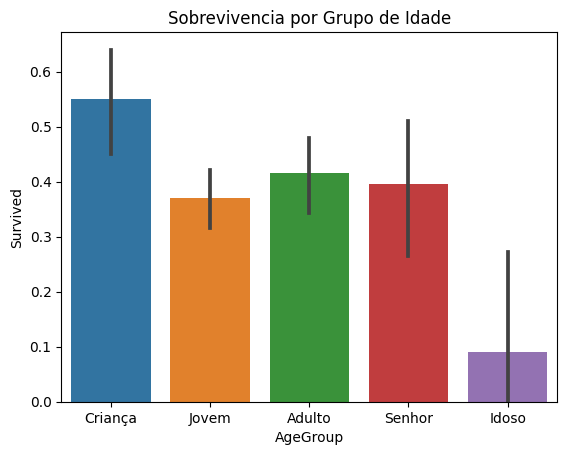

In [35]:
# Separando novamente a coluna Age em grupos, porem utilizando strings
bins = [0, 16, 32, 50, 64, np.inf]
labels = ['Criança', 'Jovem', 'Adulto', 'Senhor', 'Idoso']
graph_train['AgeGroup'] = pd.cut(graph_train["Age"], bins, labels = labels)

plt.title('Sobrevivencia por Grupo de Idade')
sns.barplot(x="AgeGroup", y="Survived", data=graph_train)

<Axes: title={'center': 'Sobrevivencia por Tarifa'}, xlabel='FareGroup', ylabel='Survived'>

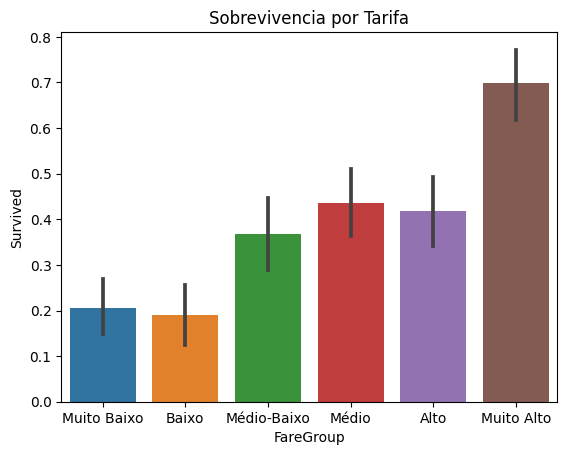

In [36]:
# Separando novamente a coluna Fare em grupos, porem utilizando strings
graph_train['FareGroup'] = pd.qcut(graph_train["Fare"], q=6, labels=['Muito Baixo', 'Baixo', 'Médio-Baixo', 'Médio', 'Alto', 'Muito Alto'])

plt.title('Sobrevivencia por Tarifa')
sns.barplot(x="FareGroup", y="Survived", data=graph_train)

<Axes: xlabel='Parch', ylabel='Survived'>

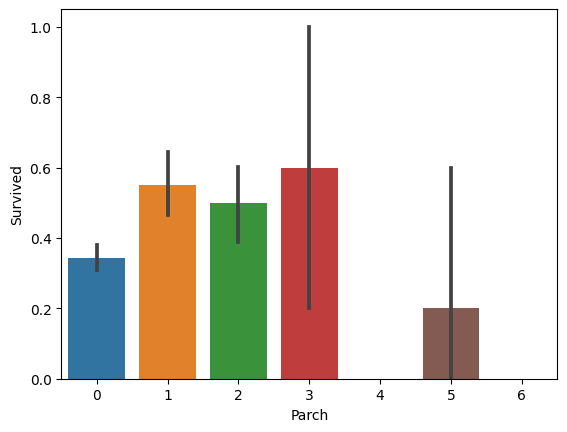

In [37]:
sns.barplot(x="Parch", y="Survived", data=graph_train)

<Axes: xlabel='SibSp', ylabel='Survived'>

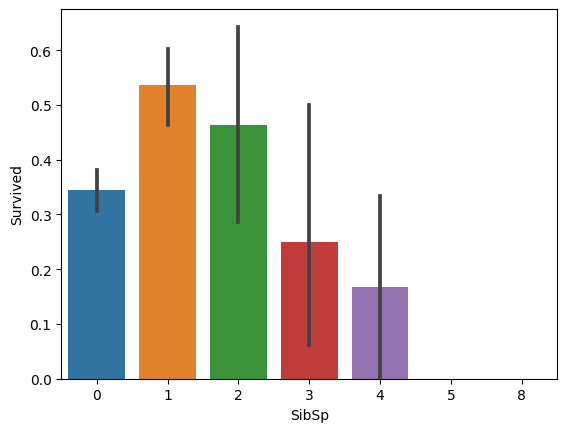

In [38]:
sns.barplot(x="SibSp", y="Survived", data=graph_train)

<Axes: xlabel='Sex', ylabel='Survived'>

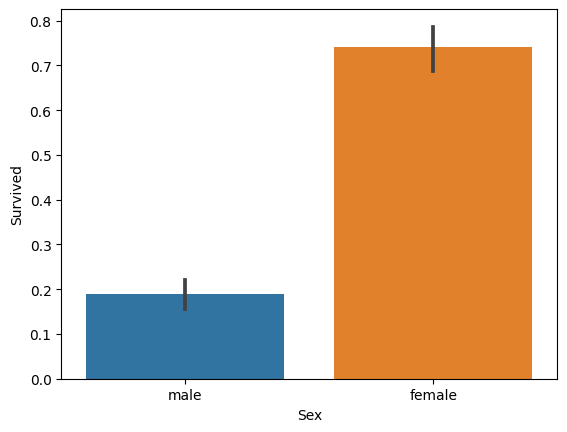

In [39]:
sns.barplot(x="Sex", y="Survived", data=graph_train)

## *Treinando o modelo*

In [ ]:
def avaliate_pipes(data, encoder, model, numerical_imputer, categorical_imputer):
    
    # Definindo Feature e Target
    X = data.drop('Survived', axis=1) # Features
    y = data['Survived'] # Target

    # Classificando as features em num e cat
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns  
    categorical_features = X.select_dtypes(include=['object']).columns

    # Aplicando Encoder nas features categóricas
    if encoder == 'one-hot':
        cat_encoder = OneHotEncoder(handle_unknown='ignore')
    elif encoder == 'ordinal':
        cat_encoder = OrdinalEncoder()
    elif encoder == 'label':
        for col in categorical_features:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
        cat_encoder = 'passthrough'
    else:
        raise ValueError('Encoder não reconhecido')

    # Tratando dados NaN com imputers
    numerical_transformer = SimpleImputer(strategy= numerical_imputer if numerical_imputer != 'zero' else 'constant', fill_value=0)
    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= categorical_imputer )), # Trata das colunas categoricas utilizando um SimpleImputer para trocar os dados NaN 
    ( encoder, cat_encoder) # Utiliza o Encoder escolhido para transformar as colunas categoricas em Numericas
])
  
    # Criando um preprocessor
    preprocessor = ColumnTransformer(    # Processo anterior a aplicação do modelo, tratamento de dados, permite transformar colunas de forma independente
        transformers=[                   # transformers = ['nome', 'transformador', 'coluna']
            ('num', numerical_transformer, numerical_features),   # tranforma as numerical features com o numerical transformer
            ('cat', categorical_transformer, categorical_features)  # tranforma as categorical features com o categorical transformer
        ])
    
    # Criando um pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), # Definindo passos do pipe, 1º passa pelo preprocessor cujo vai transformar as colunas 
        ('model', model)                # Utilizando os Imputers para preencher os NaN's e realizar o encoder das categoricas
    ])                                  # 2º Passa os dados ja processados pelo model fazendo seu treino e entregando ao final seu Score.

    
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    
    return pipeline, mean_score*100

In [41]:
model = RandomForestClassifier()
max_score = 0
for encoder in ['ordinal', 'one-hot']:
    print()
    for numerical_imputer in ['mean', 'median', 'constant', 'zero']:
        for categorical_imputer in ['most_frequent', 'constant']:
            pipeline, score = avaliate_pipes(train, encoder, model, numerical_imputer, categorical_imputer)
            print(f'Score: {score:.4}%, Model: {model}, Encoder: {encoder}, Numerical Imputer: {numerical_imputer}, Categorical Imputer: {categorical_imputer}')
            if score >= max_score:
                max_score = score
                B_encoder = encoder
                B_Num = numerical_imputer
                B_Cat = categorical_imputer
            else :max_score
            
print()

print(f'Melhor score: {max_score:.4}%')


Score: 80.7%, Model: RandomForestClassifier(), Encoder: ordinal, Numerical Imputer: mean, Categorical Imputer: most_frequent
Score: 80.48%, Model: RandomForestClassifier(), Encoder: ordinal, Numerical Imputer: mean, Categorical Imputer: constant
Score: 79.59%, Model: RandomForestClassifier(), Encoder: ordinal, Numerical Imputer: median, Categorical Imputer: most_frequent
Score: 80.37%, Model: RandomForestClassifier(), Encoder: ordinal, Numerical Imputer: median, Categorical Imputer: constant
Score: 79.7%, Model: RandomForestClassifier(), Encoder: ordinal, Numerical Imputer: constant, Categorical Imputer: most_frequent
Score: 79.92%, Model: RandomForestClassifier(), Encoder: ordinal, Numerical Imputer: constant, Categorical Imputer: constant
Score: 79.25%, Model: RandomForestClassifier(), Encoder: ordinal, Numerical Imputer: zero, Categorical Imputer: most_frequent
Score: 80.26%, Model: RandomForestClassifier(), Encoder: ordinal, Numerical Imputer: zero, Categorical Imputer: constant



In [42]:
print(B_encoder, B_Num, B_Cat)

one-hot median most_frequent


In [43]:
pipeline, score = avaliate_pipes(train, B_encoder, model, B_Num, B_Cat)

## *Gerando modelo para competição*

In [44]:
X_teste = teste
teste_ids = teste['PassengerId']
predictions = pipeline.predict(X_teste)
submission = pd.DataFrame({"PassengerId": teste_ids, "Survived": predictions})
submission.to_csv("submission.csv", index=False)